# Web and Text Analytics - Sentiment Analysis

### Authors
- Francois Cubelier
- Lisa Bueres
- Romain Charles

## Introduction
This report showcases our results for sentiment analysis. We experimented different types of recurrent neural networks on this task: basic RNN, LSTM and GRU. We studied the effect of attention on these models as well as testing different word embeddings (GloVe, FastText and Word2Vec). Finally, document level embedding were also investigated (WME, Bert sentence, GloVe average and a task specific average).

### Sentiment Analysis
Sentiment analysis is the analysis of texts such as reviews in order to detect the polarity implied by the author. The polarity is either positive, negative or neutral. 

## Methods

### RNNs

3 types of recurrent neural networks were tested: Base RNN, LSTM and GRUs. We also experimented with different hyperparameters: 
- The number of hidden layers: 1 or 2
- The size of the hidden state: 100 or 300
- The type of output layer after the main netwrok: linear or MLP (for more details on the MLP, see models/RNN.py)

### Attention
We tested 2 types of attention based on scaled dot-product attention: 
- Last hidden layer attention: 
$Attention(Q, K, V) = softmax(QK^\top/\sqrt n)V$ where V = K = output sequence and Q is the last hiddent state
- Self-attention followed by last hiddent layer attention.
First we apply a self attention:
$Attention_1(Q, K, V) = V' = softmax(QK^\top/\sqrt n)V$ where V = K = Q = output sequence.
Then we apply the last hidden layer attention:
$Attention_2(Q', K', V') = softmax(Q'K'^\top/\sqrt n)V'$ where V' = K' = output sequence of self-attention and Q is the last hidden state of the RNN.


### Document level embeddings
There numerous document level embeddings in the literature.
In tested 4 methods:
- Average glove embeddings: a sentence is encoded by the average of its GloVe word embeddings.
- Task specific average: a sentece is encoded by the average of its word embeddings and the word embedding are trained from scratch for this task.
- WME: Document embedding based on the distance (based on Word Mover Distance) between the document and randomly generated documents.
- Sentence BERT: a pre-trained document level embedding based on BERT (all-MiniLM-L6-v2 model).

In order to predict the class from the document embedding, 2 types of model were tested: linear model and MLP.

<!---
### Datasets
2 different datasets have been used in order to compare them:
- IMDB
- Yelp
They have been tested with LSTM and GRU and the embedding Glove.
-->



## Experiments

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Experiment 1: Hyperparameters
In this experiment, we compare RNN, LSTM and GRU over the IMDB datasets and examine the results by varying hyperparameters.

Todo: List hparams and explain.

In [3]:
df_1 = pd.read_csv("results/exp1_all.csv")

### Overall:
As can be seen by computing the mean of the test accuracy and the test loss, GRU and LSTM are better than RNN. GRU and LSTM have mean accuracies very close, but LSTM is able to better reduce the loss in average. RNN performed around 30% less than the others for the accuracy and the the loss, which is a non negligible difference.

Both GRU and LSTM use memory while the simple RNN does not. This allosw the two first to have more information than the RNN when performing the classification.

In [4]:
df_1.groupby("Model Type").mean()[["Test Acc", "Test Loss"]]

,Test Acc,Test Loss
Model Type,,
GRU,0.883545,0.446573
LSTM,0.880375,0.375391
RNN,0.548980,0.678701


### Output Layer Type:
The table below shows that linear layers are better than MLP layers, on both the accuracy and the loss. This can be due to the Multi-Layer Perceptron (MLP) leading to a more complex model, because of non linearity, with overfitting on the training set and thus reduced performance on the testing set, while the linear model is simpler and limited in overtfitting thanks to its structure not allowing too complex functions.

In [5]:
df_1.groupby("Output Layer Type").mean()[["Test Acc", "Test Loss"]]

,Test Acc,Test Loss
Output Layer Type,,
MLP,0.759180,0.523465
linear,0.782753,0.476979


### Number of layers:
As shown in the table below, adding one layer slighlty improves the average accuracy and decreases the loss.

Todo: compléter ?

In [6]:
df_1.groupby("Number of Layers").mean()[["Test Acc", "Test Loss"]]

,Test Acc,Test Loss
Number of Layers,,
1,0.766113,0.506772
2,0.775820,0.493671


In [7]:
df_1.groupby("Hidden Size").mean()[["Test Acc", "Test Loss"]]

,Test Acc,Test Loss
Hidden Size,,
100,0.784587,0.483162
300,0.757347,0.517282


In [8]:
df_1.groupby(["Model Type","Output Layer Type", "Hidden Size", "Number of Layers"], sort=True).mean()[["Test Acc", "Test Loss"]]

Test Acc  Test Loss
Model Type Output Layer Type Hidden Size Number of Layers                     
GRU        MLP               100         1                  0.88512   0.423704
                                         2                  0.87712   0.475683
                             300         1                  0.88096   0.523954
                                         2                  0.88552   0.436582
           linear            100         1                  0.88768   0.348002
                                         2                  0.88440   0.444155
                             300         1                  0.88564   0.482910
                                         2                  0.88192   0.437592
LSTM       MLP               100         1                  0.87304   0.462807
                                         2                  0.87956   0.410049
                             300         1                  0.87700   0.410662
                                         2                  0.88324   0.392338
           linear            100         1                  0.88560   0.287417
                                         2                  0.87576   0.326734
                             300         1                  0.88392   0.383310
                                         2                  0.88488   0.329815
RNN        MLP               100         1                  0.50516   0.689820
                                         2                  0.56544   0.667698
                             300         1                  0.50000   0.694153
                                         2                  0.49800   0.694128
           linear            100         1                  0.60004   0.652205
                                         2                  0.69612   0.609671
                             300         1                  0.52920   0.722325
                                         2                  0.49788   0.699611

<AxesSubplot:xlabel='step', ylabel='Val Loss'>

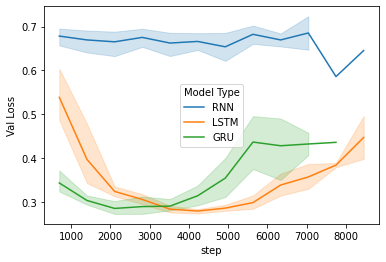

In [9]:
sns.lineplot(x="step", y="Val Loss", hue="Model Type", data=df_1)

<AxesSubplot:xlabel='Model Type', ylabel='Val Loss'>

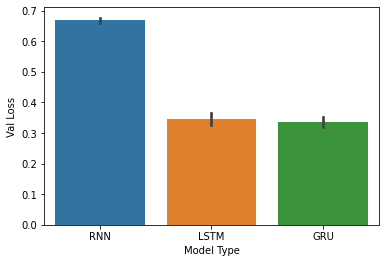

In [10]:
sns.barplot(x="Model Type", y="Val Loss", data=df_1)

<AxesSubplot:xlabel='Val Acc', ylabel='Val Loss'>

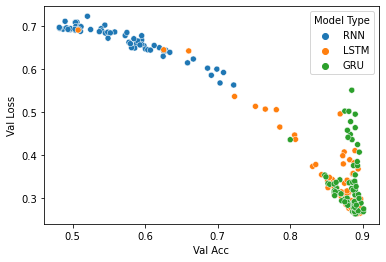

In [11]:
sns.scatterplot(x="Val Acc", y="Val Loss", hue="Model Type", data=df_1)

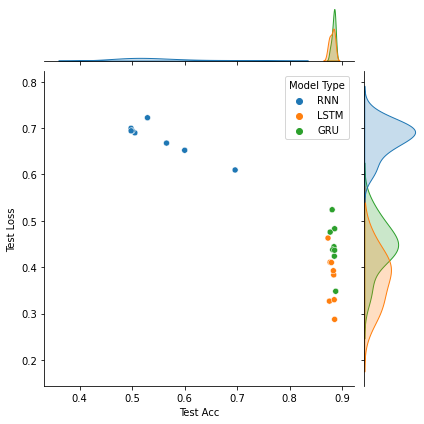

In [12]:
sns.jointplot(x="Test Acc", y="Test Loss", hue="Model Type", data=df_1, kind="scatter")

## Experiment 2: Attention
In this experiment, we analyse the effect of adding an attention layer for the sentiment analysis.

## Experiment 3: Word level embedding

## Experiment 4: Document level embedding

## Experiment 5: Performance on different datasets

## Bibliography

- Nils Reimers and Iryna Gurevych (2019). Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks. CoRR, abs/1908.10084.
- Lingfei Wu and Ian En-Hsu Yen and Kun Xu and Fangli Xu and Avinash Balakrishnan and Pin-Yu Chen and Pradeep Ravikumar and Michael J. Witbrock (2018). Word Mover's Embedding: From Word2Vec to Document Embedding. CoRR, abs/1811.01713.

